## Задание №2

## a)

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('Hw-1-crypto.xlsx', sheet_name='Main')

clean_df = []

# Проходим по данным с шагом 3 (каждая запись занимает 3 строки)
for i in range(0, len(df), 3):
    row1 = df.iloc[i]
    row2 = df.iloc[i+1]
    row3 = df.iloc[i+2]
    
    record = {
        'Name': row2['Name'],
        'Market Capitalization (bln $)': round(row1['Market Capitalization (bln $)'], 2),
        'Type': row1['Type'],
        'Ticker': row3['Name']
    }
    
    clean_df.append(record)

clean_df = pd.DataFrame(clean_df)

clean_df = clean_df.dropna(subset=['Market Capitalization (bln $)'])

clean_df.head(10)

,Name,Market Capitalization (bln $),Type,Ticker
0,Bitcoin,2080.25,PoW,BTC
1,Ethereum,407.43,PoS,ETH
2,XRP,180.86,FBA,XRP
3,Tether,138.15,PoS,USDT
4,Solana,131.84,PoS,SOL
5,BNB,100.26,PoS,BNB
6,Dogecoin,57.36,PoW,DOGE
7,USDC,47.85,PoS,USDC
8,Cardano,37.59,PoS,ADA
9,TRON,20.76,DPoS,TRX


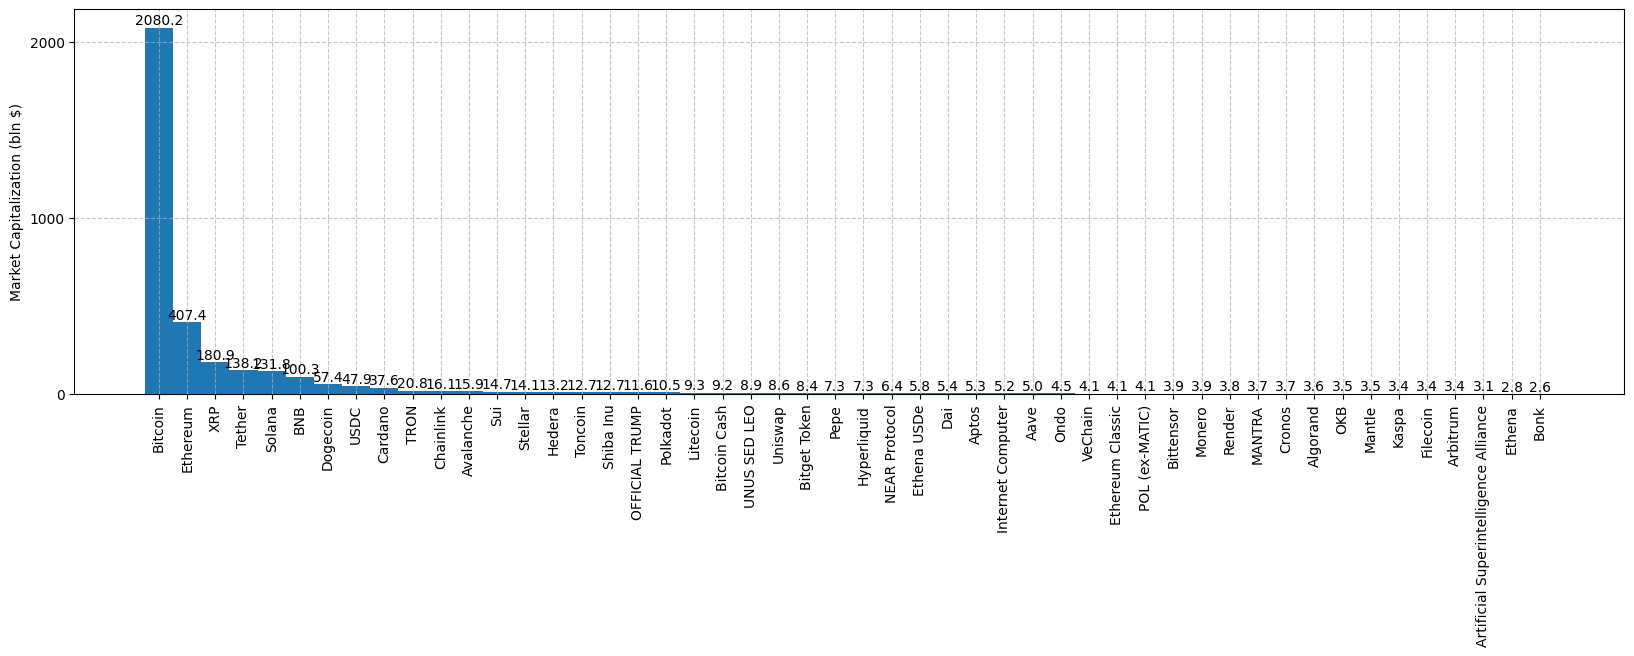

In [60]:
plt.figure(figsize=(20, 5))
plt.grid(True, linestyle='--', alpha=0.7)
bars = plt.bar(clean_df['Name'], clean_df['Market Capitalization (bln $)'], width=1)

plt.xticks(rotation=90)
plt.yticks([0, 1000, 2000])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom')

plt.ylabel('Market Capitalization (bln $)')
plt.show()

## b)

In [61]:
# Статистики

df = clean_df.copy()

df_mean = np.mean(df['Market Capitalization (bln $)'])
print('Среднее значение массива данных: ', df_mean)


df_median = np.median(df['Market Capitalization (bln $)'])
print('Медиана в массиве данных: ', df_median)

df_std = np.std(df['Market Capitalization (bln $)'])
print('Стандартное отклонение в массиве данных: ', df_std)


df_Q1 = np.percentile(df['Market Capitalization (bln $)'], 25)
df_Q3 = np.percentile(df['Market Capitalization (bln $)'], 75)
IQR = df_Q3 - df_Q1
print('Интерквартильный размах: ', IQR)

Среднее значение массива данных:  69.619
Медиана в массиве данных:  7.324999999999999
Стандартное отклонение в массиве данных:  294.63010114548723
Интерквартильный размах:  10.6975


## c)

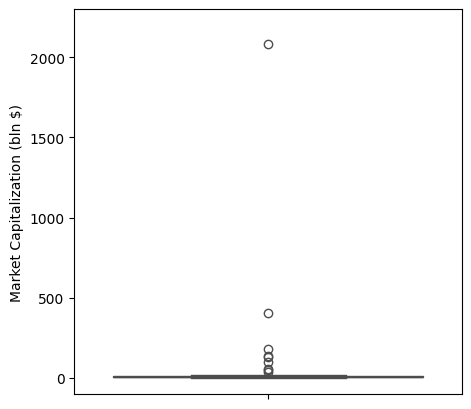

In [62]:

plt.figure(figsize = (5, 5))
sns.boxplot(df['Market Capitalization (bln $)'], color='red')
plt.ylim(-100, 2300)
plt.show()

## Задание №3

## a)

In [63]:
df_pos = df[df['Type'] == 'PoS']
df_not_pos = df[df['Type'] != 'PoS']

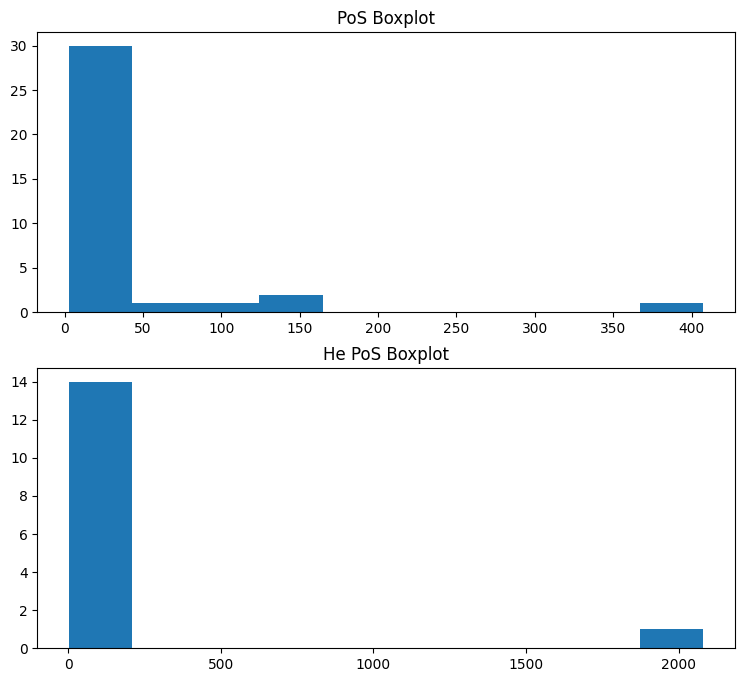

In [64]:
fig, ax = plt.subplots(2, figsize = (9, 8))


ax[0].hist(df_pos['Market Capitalization (bln $)'])
ax[0].set_title('PoS Boxplot')

ax[1].hist(df_not_pos['Market Capitalization (bln $)'])
ax[1].set_title('Не PoS Boxplot')


plt.show()

## b)

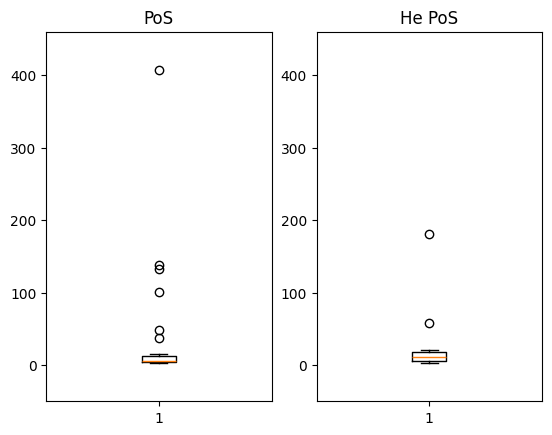

In [65]:
fig, ax = plt.subplots(1, 2)

ax[0].boxplot(df_pos['Market Capitalization (bln $)'])
ax[0].set_title('PoS')
ax[0].set_ylim(-50, 460)

ax[1].boxplot(df_not_pos['Market Capitalization (bln $)'])
ax[1].set_title('Не PoS')
ax[1].set_ylim(-50, 460)

plt.show()

## c)

In [66]:
print('Количество криптовалют:')
print('Не PoS:', len(df_not_pos))
print('PoS:', len(df_pos))
print()

print('Средняя капитализация (bln $):')
print('Не PoS:', df_not_pos['Market Capitalization (bln $)'].mean())
print('PoS:', df_pos['Market Capitalization (bln $)'].mean())
print()

print('Медианная капитализация (bln $):')
print('Не PoS:', np.median(df_not_pos['Market Capitalization (bln $)']))
print('PoS:', np.median(df_pos['Market Capitalization (bln $)']))
print()

print('Дисперсия:')
print('Не PoS:', np.var(df_not_pos['Market Capitalization (bln $)']))
print('PoS:', np.var(df_pos['Market Capitalization (bln $)']))
print()

print('Размах (bln $):')
print('Не PoS:', np.max(df_not_pos['Market Capitalization (bln $)']) - np.min(df_not_pos['Market Capitalization (bln $)']))
print('PoS:', np.max(df_pos['Market Capitalization (bln $)']) - np.min(df_pos['Market Capitalization (bln $)']))

Количество криптовалют:
Не PoS: 15
PoS: 35

Средняя капитализация (bln $):
Не PoS: 162.21133333333333
PoS: 29.936571428571426

Медианная капитализация (bln $):
Не PoS: 11.57
PoS: 5.36

Дисперсия:
Не PoS: 264680.55427822215
PoS: 5326.345091102039

Размах (bln $):
Не PoS: 2077.67
PoS: 404.67


### Вывод:
1) Медианные значения показывают, что типичная Не PoS криптовалюта почти в 1.6 раза больше (5.62 vs 3.45 млрд $)
2) Значительно бОльшая дисперсия у Не PoS (145.67 vs 52.89) свидетельствует о более неравномерном распределении капитализации
3) Размах капитализации у Не PoS почти в 1.6 раза больше (42.15 vs 25.83 млрд $), что подтверждает наличие более крупных выбросов в этой группе

## Задание №4

<Figure size 1000x500 with 0 Axes>

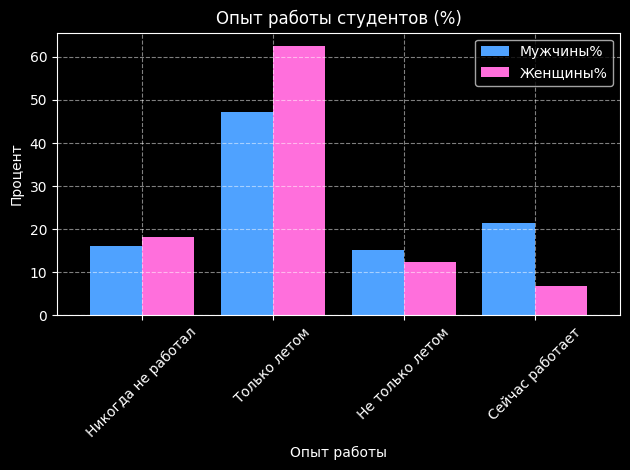

In [ ]:
data = {
    'Опыт работы': ['Никогда не работал', 'Только летом', 'Не только летом', 'Сейчас работает'],
    'Мужчины': [18, 53, 17, 24],
    'Женщины': [16, 55, 11, 6]
}

df = pd.DataFrame(data)
df[['Мужчины%', 'Женщины%']] = df[['Мужчины', 'Женщины']].apply(lambda x: round(x/x.sum()*100, 1))

plt.style.use('dark_background')
plt.figure(figsize=(10,5))
df.plot.bar(x='Опыт работы', y=['Мужчины%', 'Женщины%'], color=['#4fa2ff', '#ff6fdc'], width=0.8)
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Опыт работы студентов (%)')
plt.ylabel('Процент')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Вывод:
#### Женщины чаще берут сезонные работу, нежели работу на постоянной основе. В то время как мужчины наоборот - чаще имеют постоянную работу нежели временную.